In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


(0, 16)

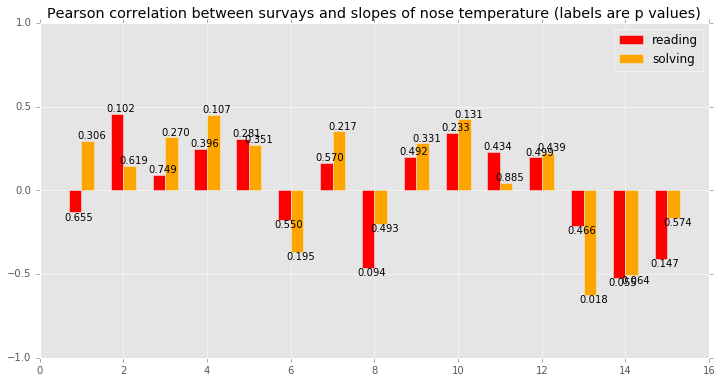

In [2]:
meta = pd.read_csv("../Datafiles/working/meta.csv").values
meta[:,32:32+12] = 7 - meta[:,32:32+12]

data = pd.read_csv("../Datafiles/working/general_features.csv")
features = np.array([data[data["participant"]=="P"+str(i)].values[0] for i in range(1, 15)])

# ixs_label = range(32, 32+12)
ixs_label = range(32, 32+13) + [30, 31]
ixs_feature = [1, 2]

cs = []
ps = []
n_label= len(ixs_label)
n_feature = len(ixs_feature)
for i in ixs_feature:
    for j in ixs_label:
        X = features[:, i]
        y = meta[:, j]
        c, p = stats.pearsonr(X, y)
        cs.append(c)
        ps.append(p)

cs = np.array(cs).reshape(n_feature, n_label)
ps = np.array(ps).reshape(n_feature, n_label)
        
labels = ["reading", "solving"]
colors = ["red", "orange"]
plt.figure(figsize=(12, 6))
plt.title("Pearson correlation between survays and slopes of nose temperature (labels are p values)")
for i in range(2):
    plt.bar(np.array(range(n_label)) + 0.7 + 0.3*i, cs[i, :], width=0.3, color=colors[i], label=labels[i])
    for j in range(n_label):
        if cs[i, j] > 0:
                va = "bottom"
        else:
                va = "top"
        plt.text(j + 0.6 + 0.3*i, cs[i, j], "%.3f" % ps[i, j], ha = 'left', va = va)
plt.legend(loc="upper right")
plt.ylim(-1.0, 1.0)
plt.xlim(0, n_label+1)

## without outlier

(0, 16)

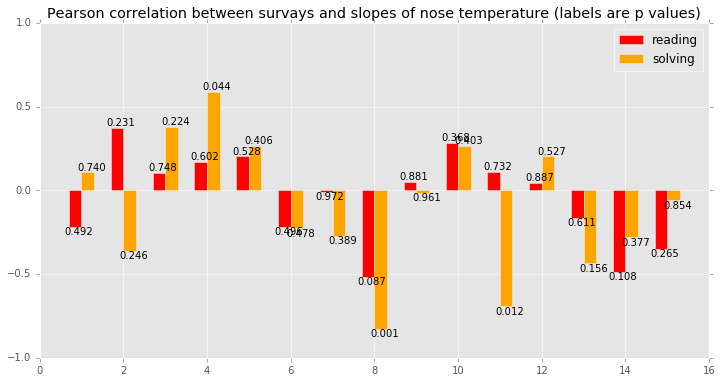

In [3]:
meta = pd.read_csv("../Datafiles/working/meta.csv").values
meta[:,32:32+12] = 7 - meta[:,32:32+12]

data = pd.read_csv("../Datafiles/working/general_features.csv")
features = np.array([data[data["participant"]=="P"+str(i)].values[0] for i in range(1, 15)])

meta = np.delete(meta, [9, 10], axis=0)
features = np.delete(features, [9, 10], axis=0)

# ixs_label = range(32, 32+12)
ixs_label = range(32, 32+13) + [30, 31]
ixs_feature = [1, 2]

cs = []
ps = []
n_label= len(ixs_label)
n_feature = len(ixs_feature)
for i in ixs_feature:
    for j in ixs_label:
        X = features[:, i]
        y = meta[:, j]
        c, p = stats.pearsonr(X, y)
        cs.append(c)
        ps.append(p)

cs = np.array(cs).reshape(n_feature, n_label)
ps = np.array(ps).reshape(n_feature, n_label)
        
labels = ["reading", "solving"]
colors = ["red", "orange"]
plt.figure(figsize=(12, 6))
plt.title("Pearson correlation between survays and slopes of nose temperature (labels are p values)")
for i in range(2):
    plt.bar(np.array(range(n_label)) + 0.7 + 0.3*i, cs[i, :], width=0.3, color=colors[i], label=labels[i])
    for j in range(n_label):
        if cs[i, j] > 0:
                va = "bottom"
        else:
                va = "top"
        plt.text(j + 0.6 + 0.3*i, cs[i, j], "%.3f" % ps[i, j], ha = 'left', va = va)
plt.legend(loc="upper right")
plt.ylim(-1.0, 1.0)
plt.xlim(0, n_label+1)